# Visualisierung

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## MNIST und MLP laden

Wir laden den MNIST-Datensatz und teilen ihn auf.

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

mnist = fetch_openml('mnist_784')

X, y = mnist.data.to_numpy(), mnist.target.to_numpy().astype(int)

#X = MinMaxScaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [3]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(70000, 784))

Wir verwenden die gespeicherten Gewichte - unser MLP ist bereits trainiert worden:

In [4]:
from dl1 import MLP

mlp = MLP(784,128,10)
mlp.load("mnist")

print(f'Treffergenauigkeit: {mlp.score(X_test, y_test)[0]:.2%}')

Gewichte wurden geladen


C:\Users\Admin\Documents\Projects\python\ml1\deep_learning\dl1.py:118: RuntimeWarning: overflow encountered in exp
  self.transfer = lambda x: 1 / (1 + np.exp(-x))


Treffergenauigkeit: 94.41%


### Einige Einblicke

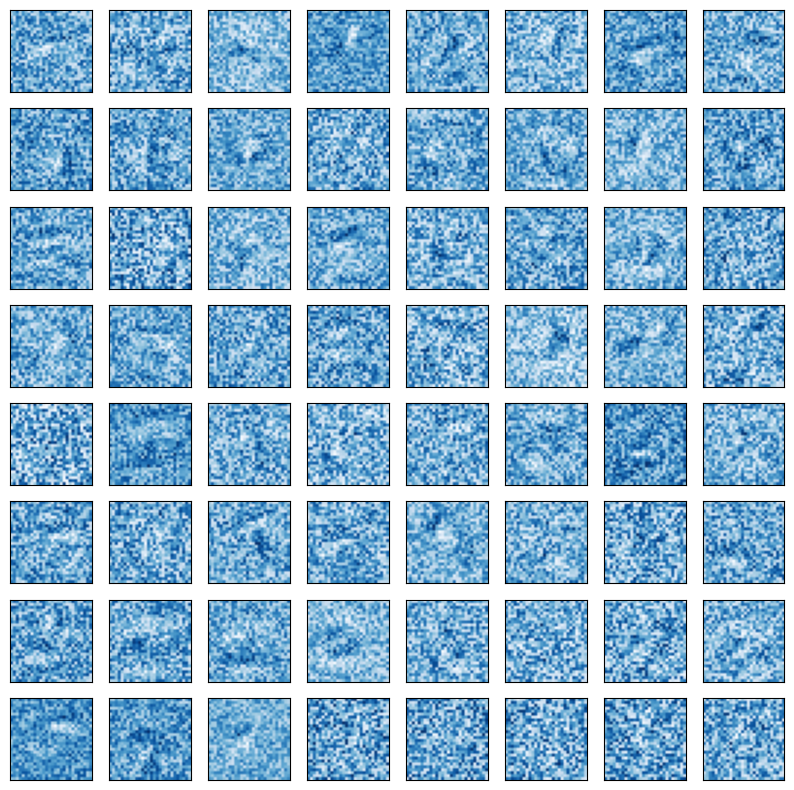

In [5]:
from dl1 import gallery

k=1
input = np.array([ int(n == k) for n in range(784)])
mlp.predict(input)

weights = mlp.wih.T  

plt.figure(figsize=(10,10));
rows, cols = 8,8
images = [weights[:, i].reshape(28,28) for i in range(rows * cols)]
gallery(images,rows, cols,cmap='Blues');

